In [63]:
import numpy as np
import pandas as pd
import math
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [37]:
train_df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\ML_regression\\databases\\train.csv")
test_df =  pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\ML_regression\\databases\\test.csv")

In [38]:
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [39]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,19/10/2018 16:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,19/10/2018 16:15,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,19/10/2018 16:30,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,19/10/2018 16:45,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,19/10/2018 17:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,31/12/2018 23:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,31/12/2018 23:15,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,31/12/2018 23:30,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,31/12/2018 23:45,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [40]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64


In [41]:
imputer_mean_1 = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Reactive_Power_kVarh'] = imputer_mean_1.fit_transform(train_df[['Leading_Current_Reactive_Power_kVarh']])
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [42]:
imputer_mean_2 = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Power_Factor'] = imputer_mean_2.fit_transform(train_df[['Leading_Current_Power_Factor']])
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [43]:
imputer_mode = SimpleImputer(strategy='most_frequent')
train_df['WeekStatus'] = train_df['WeekStatus'].astype(str)
train_df['WeekStatus'] = imputer_mode.fit_transform(train_df[['WeekStatus']]).ravel()
train_df


,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [44]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d/%m/%Y %H:%M')
train_df['Day_of_week'] = train_df['date'].dt.day_name()
train_df 
train_df.to_csv("train_processed.csv", index=False)


In [45]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64


In [57]:
from sklearn.preprocessing import StandardScaler

# Assuming train_df and test_df are your training and testing datasets

# Standardization
scaler = StandardScaler()

# Fit and transform the training data
train_df_std = scaler.fit_transform(train_df[['Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor' ,'Leading_Current_Power_Factor' , 'NSM'  ]])  # Include multiple variables here
train_df_std = pd.DataFrame(train_df_std, columns=['Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor' , 'NSM' ])

# Transform the testing data using the same scaler
test_df_std = scaler.transform(test_df[['Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor' ,'Leading_Current_Power_Factor' , 'NSM' ]])  # Include the same variables as in the training data
test_df_std = pd.DataFrame(test_df_std, columns=['Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor' ,'Leading_Current_Power_Factor' , 'NSM' ])

# Now train_df_std and test_df_std contain the standardized versions of the original datasets with multiple variables


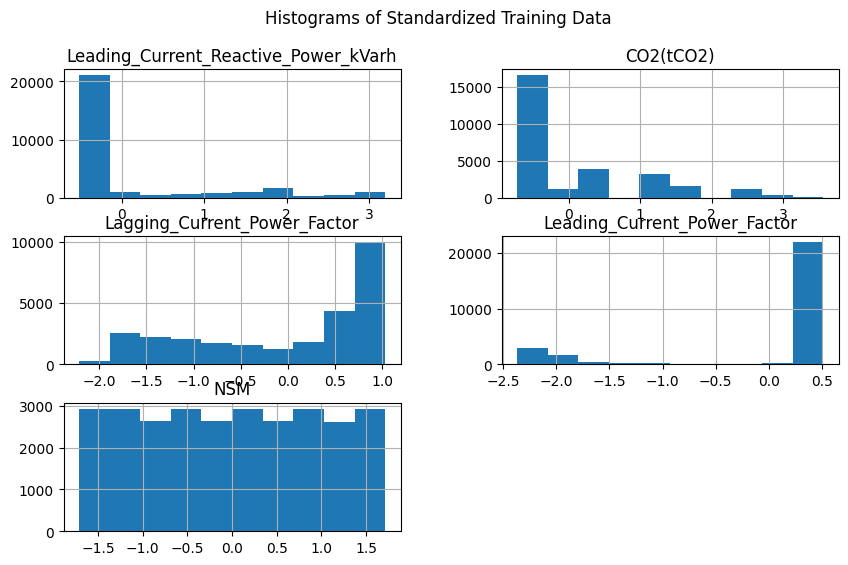

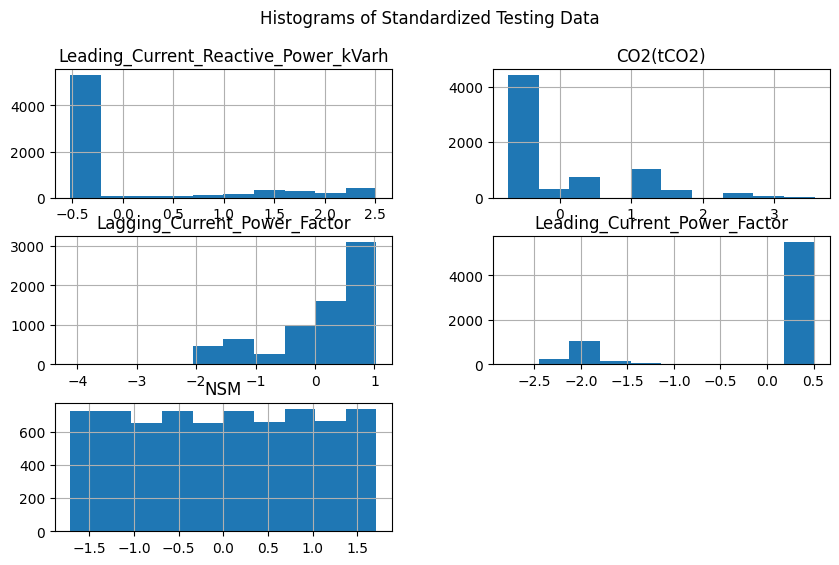

In [58]:
# Plot histograms of the standardized training dataset
train_df_std.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Training Data')
plt.show()

# Plot histograms of the standardized testing dataset
test_df_std.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Testing Data')
plt.show()

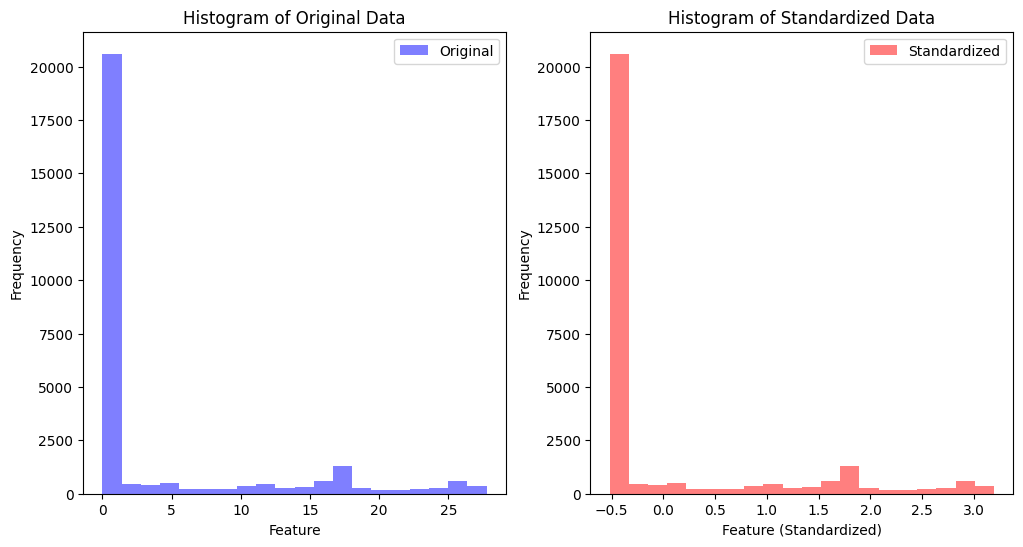

In [59]:

# Plot histograms of the original and standardized datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['Leading_Current_Reactive_Power_kVarh'], bins=20, color='blue', alpha=0.5, label='Original')
plt.title('Histogram of Original Data')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(train_df_std['Leading_Current_Reactive_Power_kVarh'], bins=20, color='red', alpha=0.5, label='Standardized')
plt.title('Histogram of Standardized Data')
plt.xlabel('Feature (Standardized)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [60]:
# Summary statistics of original dataset
print("Summary Statistics of Original Data:")
print(train_df.describe())

# Summary statistics of standardized dataset
print("\nSummary Statistics of Standardized Data:")
print(train_df_std.describe())

Summary Statistics of Original Data:
                Id                           date  \
count  27999.00000                          27999   
mean   14000.00000  2018-05-26 19:45:02.025072384   
min        1.00000            2018-01-01 00:00:00   
25%     7000.50000            2018-03-14 21:52:30   
50%    14000.00000            2018-05-26 19:45:00   
75%    20999.50000            2018-08-07 17:37:30   
max    27999.00000            2018-10-19 15:45:00   
std     8082.75943                            NaN   

       Lagging_Current_Reactive.Power_kVarh  \
count                          27999.000000   
mean                              13.230912   
min                                0.000000   
25%                                2.740000   
50%                                5.040000   
75%                               22.820000   
max                               96.910000   
std                               16.469935   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
